In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

current_directory = os.getcwd()
if current_directory != '/project/':
    os.chdir('/project/')

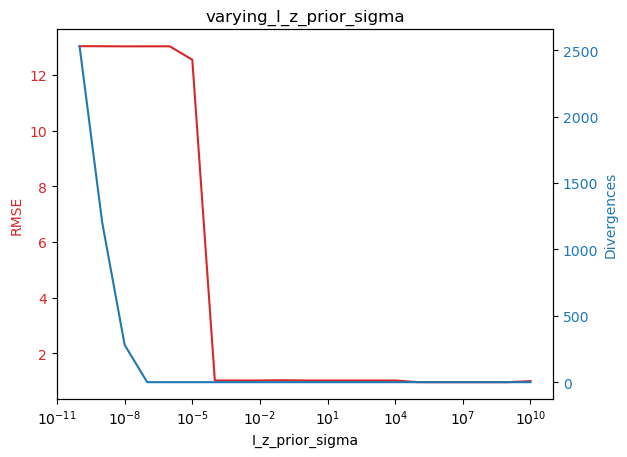

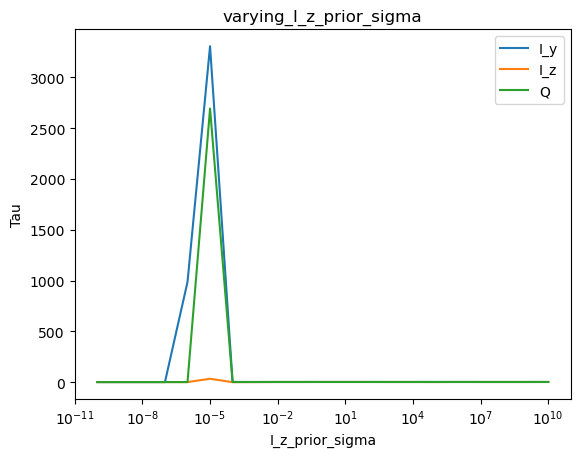

In [21]:
file_folder_name  = 'varying_Q_prior_sigma'
varying_column_name = ('Parameters', 'Q', 'Sigma')

path = 'results/auto_generated_results/' + file_folder_name + '/' + file_folder_name + '.xlsx'
title = file_folder_name
xlabel = title.replace('varying_','')

data = pd.read_excel(path, header=[0,1,2], index_col=0)
data = data.sort_values(varying_column_name)

I_y_tau = ('Results', 'I_y', 'Average tau')
I_z_tau = ('Results', 'I_z', 'Average tau')
Q_tau = ('Results', 'Q', 'Average tau')
RMSE = ('Results', 'Misc', 'RMSE')
diverging = ('Results', 'Misc', 'Average Diverging')

varying_parameter = data[varying_column_name]

fig1, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel(xlabel)
ax1.set_ylabel('RMSE', color=color)
ax1.plot(varying_parameter, data[RMSE], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Divergences', color=color)  # we already handled the x-label with ax1
ax2.plot(varying_parameter, data[diverging], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.xscale('log')
plt.title(title)

fig1.savefig('results/auto_generated_results/' + file_folder_name + '/performace_variation.png')

plt.show()

fig2 = plt.figure()
plt.plot(varying_parameter, data[I_y_tau], label = I_y_tau[1])
plt.plot(varying_parameter, data[I_z_tau], label = I_z_tau[1])
plt.plot(varying_parameter, data[Q_tau], label = Q_tau[1])
plt.legend()
plt.ylabel('Tau')
plt.xlabel(xlabel)
plt.xscale('log')
plt.title(title)

fig2.savefig('results/auto_generated_results/' + file_folder_name + '/convergance_variation.png')

